In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor

In [2]:
np.random.seed(42)
rows = 5000

df = pd.DataFrame({
    "temperature": np.random.normal(25, 5, rows),
    "humidity": np.random.normal(60, 10, rows),
    "wind_speed": np.random.normal(10, 3, rows),
    "pressure": np.random.normal(1013, 7, rows),
    "precipitation": np.abs(np.random.normal(3, 2, rows))
})

df.head()

,temperature,humidity,wind_speed,pressure,precipitation
0,27.483571,55.762403,7.964516,1011.996037,3.696572
1,24.308678,55.465859,9.083502,1012.771409,3.566647
2,28.238443,42.043568,8.207857,1013.450064,1.126960
3,32.615149,56.699098,10.331254,1019.628030,4.159168
4,23.829233,67.328291,13.591536,1007.769479,0.019835


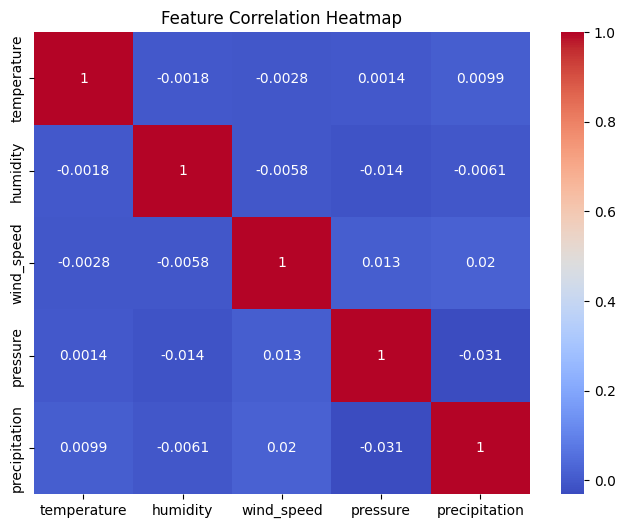

In [3]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

In [5]:
X = df.drop("temperature", axis=1)
y = df["temperature"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [6]:
model = RandomForestRegressor(n_estimators=200, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=200, random_state=42)

MAE: 4.066536775575345
R² : -0.09046370415928795


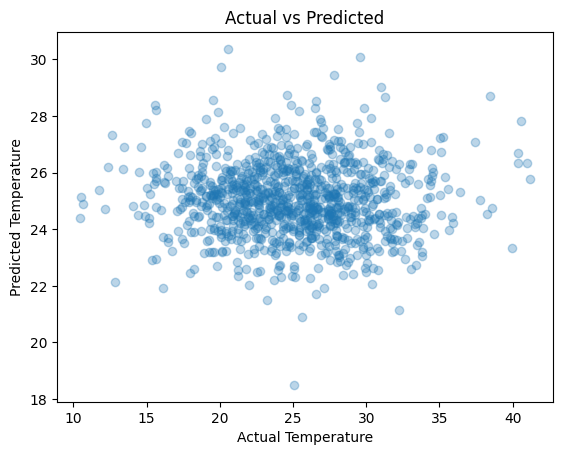

In [7]:
preds = model.predict(X_test)

print("MAE:", mean_absolute_error(y_test, preds))
print("R² :", r2_score(y_test, preds))

plt.scatter(y_test, preds, alpha=0.3)
plt.xlabel("Actual Temperature")
plt.ylabel("Predicted Temperature")
plt.title("Actual vs Predicted")
plt.show()

In [8]:
import os
os.chdir("..")   # go to project root
os.listdir()

['requirements.txt',
 'models',
 'README.md',
 '.gitignore',
 '.git',
 'data',
 'notebooks',
 'weather-forecasting-ml',
 'src']